In [16]:
import keras
import numpy as np
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, AveragePooling2D
from keras.initializers import he_normal
from keras import optimizers
from keras.callbacks import LearningRateScheduler, TensorBoard
from keras.layers.normalization import BatchNormalization
from keras.utils.data_utils import get_file







In [19]:
num_classes  = 10
batch_size   = 128
epochs       = 170
iterations   = 391
dropout      = 0.5
weight_decay = 0.0005
log_filepath = './vgg19_retrain_logs/'

def scheduler(epoch):
  learning_rate_init = 0.1
  if epoch > 80:
    learning_rate_init = 0.01
  if epoch > 120:
    learning_rate_init = 0.001
  return learning_rate_init

WEIGHTS_PATH = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg19_weights_tf_dim_ordering_tf_kernels.h5'
filepath = get_file(r'/home/lab321-day/文档/back/data/vgg19_retrain_logs/vgg19_weights_tf_dim_ordering_tf_kernels.h5', WEIGHTS_PATH)
#, cache_subdir='models'

In [20]:
# data loading
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')



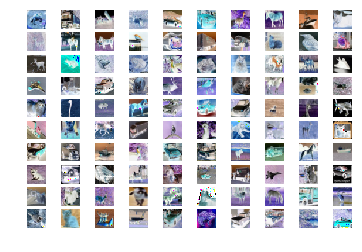

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(facecolor='white')  
  
for i in range(100):  
    plt.subplot(10, 10, i+1)  
    plt.imshow(x_train[i])  
    plt.axis("off")  
  
plt.show()  

In [22]:
# data preprocessing 
x_train[:,:,:,0] = (x_train[:,:,:,0]-123.680)
x_train[:,:,:,1] = (x_train[:,:,:,1]-116.779)
x_train[:,:,:,2] = (x_train[:,:,:,2]-103.939)
x_test[:,:,:,0] = (x_test[:,:,:,0]-123.680)
x_test[:,:,:,1] = (x_test[:,:,:,1]-116.779)
x_test[:,:,:,2] = (x_test[:,:,:,2]-103.939)

In [23]:

# build model
model = Sequential()

# Block 1
model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block1_conv1', input_shape=x_train.shape[1:]))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block1_conv2'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool'))

# Block 2
model.add(Conv2D(128, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block2_conv1'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block2_conv2'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool'))

# Block 3
model.add(Conv2D(256, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block3_conv1'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block3_conv2'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block3_conv3'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block3_conv4'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool'))

# Block 4
model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block4_conv1'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block4_conv2'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block4_conv3'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block4_conv4'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool'))

# Block 5
model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block5_conv1'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block5_conv2'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block5_conv3'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block5_conv4'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# model modification for cifar-10
model.add(Flatten(name='flatten'))
model.add(Dense(4096, use_bias = True, kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='fc_cifa10'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(4096, kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='fc2'))  
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout))      
model.add(Dense(10, kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='predictions_cifa10'))        
model.add(BatchNormalization())
model.add(Activation('softmax'))

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
__________

In [25]:
# load pretrained weight from VGG19 by name      
model.load_weights(filepath, by_name=True)

# -------- optimizer setting -------- #
sgd = optimizers.SGD(lr=.1, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

tb_cb = TensorBoard(log_dir=log_filepath, histogram_freq=0)
change_lr = LearningRateScheduler(scheduler)
cbks = [change_lr,tb_cb]

In [ ]:


print('Using real-time data augmentation.')
datagen = ImageDataGenerator(horizontal_flip=True,
        width_shift_range=0.125,height_shift_range=0.125,fill_mode='constant',cval=0.)

datagen.fit(x_train)

model.fit_generator(datagen.flow(x_train, y_train,batch_size=batch_size),
                    steps_per_epoch=iterations,
                    epochs=epochs,
                    callbacks=cbks,
                    validation_data=(x_test, y_test))
model.save('retrain.h5')

Using real-time data augmentation.
Epoch 1/170
391/391 [==============================] - 120s - loss: 4.3667 - acc: 0.6497 - val_loss: 3.8568 - val_acc: 0.5721